In [1]:

import sys
sys.path.append('..')

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from src.data import MIMICLoader, EDPreprocessor, FeatureEngineer, OutcomeLabeler

sns.set_style('whitegrid')
plt.rcParams['figure.figsize'] = (14, 6)

%load_ext autoreload
%autoreload 2

In [2]:
print("📂 Carregando dados preprocessados...")

try:
    df = pd.read_parquet('../data/processed/ed_preprocessed.parquet')
    print(f"✓ Dados carregados: {len(df):,} registros")
except FileNotFoundError:
    print("⚠️  Arquivo preprocessado não encontrado")
    print("   Execute 02_data_preprocessing.ipynb primeiro")
    raise


📂 Carregando dados preprocessados...
✓ Dados carregados: 189,158 registros


In [3]:
print("\n🔬 Carregando dados de laboratório...")

loader = MIMICLoader(data_root='../data/raw')

try:
    data = loader.load_all(
        load_labs=True,
        lab_strategy='filtered',  # Apenas labs relevantes
        load_vitals=False,
        sample_size=None
    )
    
    lab_data = data.get('labevents', pd.DataFrame())
    lab_items = data.get('d_labitems', pd.DataFrame())
    
    if not lab_data.empty:
        print(f"✓ Lab events carregados: {len(lab_data):,} registros")
    else:
        print("⚠️  Lab events não disponíveis")
        
except Exception as e:
    print(f"⚠️  Erro ao carregar labs: {e}")
    lab_data = pd.DataFrame()
    lab_items = pd.DataFrame()

INFO:src.data.mimic_loader:============================================================
INFO:src.data.mimic_loader:🚀 MIMIC-IV Loader Otimizado v2.0
INFO:src.data.mimic_loader:============================================================



🔬 Carregando dados de laboratório...


INFO:src.data.mimic_loader:✓ Pacientes: 299,712
INFO:src.data.mimic_loader:✓ ED stays: 425,087
INFO:src.data.mimic_loader:✓ Triage: 425,087
INFO:src.data.mimic_loader:✓ Diagnosis: 899,050
INFO:src.data.mimic_loader:✓ Medrecon: 2,987,342
INFO:src.data.mimic_loader:✓ Admissions: 332,101
INFO:src.data.mimic_loader:✓ Diagnoses ICD: 3,797,277
INFO:src.data.mimic_loader:✓ Lab items dict: 1,622
INFO:src.data.mimic_loader:
INFO:src.data.mimic_loader:🧪 CARREGANDO LABEVENTS - Estratégia: FILTERED
INFO:src.data.mimic_loader:============================================================
INFO:src.data.mimic_loader:🎯 Modo FILTERED: 56 itemids relevantes
INFO:src.data.mimic_loader:   Chunk  10: 4,956,997 labs | Taxa: 240,591 rows/s
INFO:src.data.mimic_loader:   Chunk  20: 9,902,190 labs | Taxa: 237,146 rows/s
INFO:src.data.mimic_loader:   Chunk  30: 14,920,451 labs | Taxa: 235,372 rows/s
INFO:src.data.mimic_loader:   Chunk  40: 19,881,244 labs | Taxa: 233,612 rows/s
INFO:src.data.mimic_loader:   Chunk 

✓ Lab events carregados: 58,682,574 registros


In [5]:
print("\n⚙️  Inicializando Feature Engineer...")

engineer = FeatureEngineer(
    df=df,
    lab_data=lab_data,
    lab_items=lab_items
)

print("✓ Feature Engineer inicializado")


INFO:src.data.feature_engineering:✓ Configuração de labs carregada
INFO:src.data.feature_engineering:✓ DataFrame validado: 189,158 registros



⚙️  Inicializando Feature Engineer...
✓ Feature Engineer inicializado


In [8]:
print("\n" + "="*60)
print("EXTRAÇÃO DE TRIAGE FEATURES")
print("="*60)

df_with_triage = engineer.extract_triage_features()

# Verificar resultado
triage_cols = [c for c in df_with_triage.columns if c.startswith('triage_')]
print(f"\n✅ {len(triage_cols)} triage features extraídas:")
for col in triage_cols:
    completeness = df_with_triage[col].notna().sum() / len(df_with_triage) * 100
    print(f"  {col:30s}: {completeness:5.1f}% completo")

INFO:src.data.feature_engineering:
INFO:src.data.feature_engineering:🏥 EXTRAÇÃO DE TRIAGE FEATURES
INFO:src.data.feature_engineering:============================================================
INFO:src.data.feature_engineering:  ✓ Age: média 60.0 anos
INFO:src.data.feature_engineering:  ✓ Gender: 49.0% masculino
INFO:src.data.feature_engineering:  ✓ triage_heart_rate: 99.9% válidos
INFO:src.data.feature_engineering:  ✓ triage_respiratory_rate: 98.9% válidos
INFO:src.data.feature_engineering:  ✓ triage_sbp: 99.7% válidos
INFO:src.data.feature_engineering:  ✓ triage_dbp: 99.5% válidos
INFO:src.data.feature_engineering:  ✓ triage_temperature: 98.1% válidos
INFO:src.data.feature_engineering:  ✓ triage_spo2: 99.0% válidos
INFO:src.data.feature_engineering:  ✓ ESI Acuity: média 2.37



EXTRAÇÃO DE TRIAGE FEATURES


INFO:src.data.feature_engineering:  ✓ Chief Complaint: 189156 com texto
INFO:src.data.feature_engineering:
✅ Total de features de triagem: 13
INFO:src.data.feature_engineering:
📊 Completude das features:
INFO:src.data.feature_engineering:  triage_completeness           : 100.0%
INFO:src.data.feature_engineering:  triage_gender_male            : 100.0%
INFO:src.data.feature_engineering:  triage_gender_female          : 100.0%
INFO:src.data.feature_engineering:  triage_pain                   :  95.2%



✅ 13 triage features extraídas:
  triage_completeness           : 100.0% completo
  triage_age                    : 100.0% completo
  triage_gender_male            : 100.0% completo
  triage_gender_female          : 100.0% completo
  triage_heart_rate             :  99.9% completo
  triage_respiratory_rate       :  98.9% completo
  triage_sbp                    :  99.7% completo
  triage_dbp                    :  99.5% completo
  triage_temperature            :  98.1% completo
  triage_spo2                   :  99.0% completo
  triage_acuity                 : 100.0% completo
  triage_pain                   :  95.2% completo
  triage_chief_complaint        : 100.0% completo


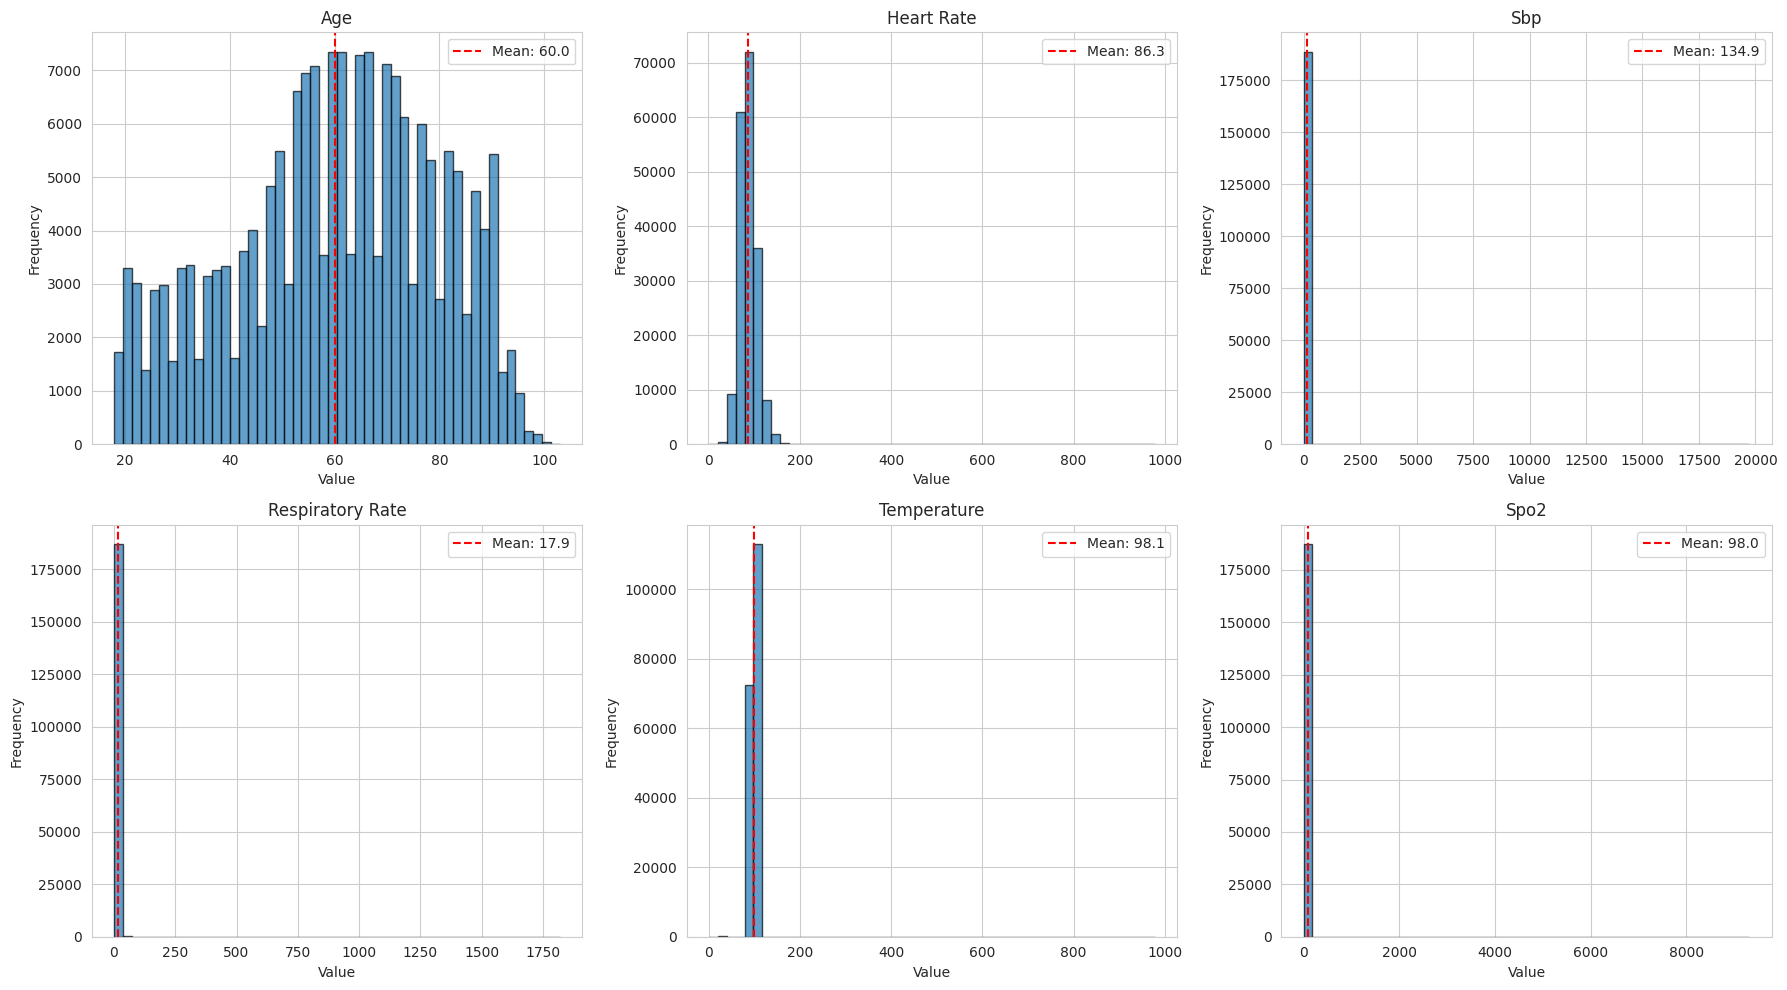

In [9]:
fig, axes = plt.subplots(2, 3, figsize=(18, 10))
axes = axes.flatten()

vital_features = [
    'triage_age', 'triage_heart_rate', 'triage_sbp', 
    'triage_respiratory_rate', 'triage_temperature', 'triage_spo2'
]

for idx, feature in enumerate(vital_features):
    if feature in df_with_triage.columns:
        df_with_triage[feature].hist(bins=50, ax=axes[idx], edgecolor='black', alpha=0.7)
        axes[idx].set_title(feature.replace('triage_', '').replace('_', ' ').title())
        axes[idx].set_xlabel('Value')
        axes[idx].set_ylabel('Frequency')
        
        # Adicionar linha de média
        mean_val = df_with_triage[feature].mean()
        axes[idx].axvline(mean_val, color='red', linestyle='--', 
                         label=f'Mean: {mean_val:.1f}')
        axes[idx].legend()

plt.tight_layout()
plt.show()

In [10]:
if not lab_data.empty:
    print("\n" + "="*60)
    print("EXTRAÇÃO DE LABORATORY FEATURES")
    print("="*60)
    
    df_with_labs = engineer.extract_lab_features(
        time_window_hours=12,
        use_first_value=True
    )
    
    # Verificar resultado
    lab_value_cols = [c for c in df_with_labs.columns if c.startswith('lab_') and c.endswith('_value')]
    print(f"\n✅ {len(lab_value_cols)} lab features extraídas")
    
    # Mostrar utilização por grupo
    ordered_cols = [c for c in df_with_labs.columns if c.endswith('_ordered')]
    print("\n📊 Utilização de laboratórios:")
    for col in ordered_cols:
        group = col.replace('lab_', '').replace('_ordered', '')
        pct = df_with_labs[col].sum() / len(df_with_labs) * 100
        print(f"  {group:15s}: {pct:5.1f}% dos pacientes")
else:
    print("\n⚠️  Pulando extração de labs (dados não disponíveis)")
    df_with_labs = df_with_triage

INFO:src.data.feature_engineering:
INFO:src.data.feature_engineering:🔬 EXTRAÇÃO DE LABORATORY FEATURES
INFO:src.data.feature_engineering:============================================================



EXTRAÇÃO DE LABORATORY FEATURES


INFO:src.data.feature_engineering:  → 1,838,673 labs na janela de 12h
INFO:src.data.feature_engineering:  → 76,454 ED stays com labs
INFO:src.data.feature_engineering:  → 1,838,673 labs dos 68 testes relevantes
INFO:src.data.feature_engineering:
  📊 Distribuição por grupo:
INFO:src.data.feature_engineering:    CBC            : 759,125 ( 41.3%)
INFO:src.data.feature_engineering:    CHEM           : 398,522 ( 21.7%)
INFO:src.data.feature_engineering:    BLOOD_GAS      : 277,123 ( 15.1%)
INFO:src.data.feature_engineering:    COAG           : 117,837 (  6.4%)
INFO:src.data.feature_engineering:    LFTS           : 108,251 (  5.9%)
INFO:src.data.feature_engineering:
  🔄 Agregando labs por grupo...
INFO:src.data.feature_engineering:  ✓ 76,454 stays com labs agregados
INFO:src.data.feature_engineering:
  📊 Utilização de labs:
INFO:src.data.feature_engineering:    Média de grupos por paciente: 1.93
INFO:src.data.feature_engineering:    Pacientes sem labs: 112704
INFO:src.data.feature_engineerin


✅ 11 lab features extraídas

📊 Utilização de laboratórios:
  CBC            :  31.3% dos pacientes
  CHEM           :  32.0% dos pacientes
  COAG           :  19.1% dos pacientes
  UA             :  13.5% dos pacientes
  LACTATE        :  13.0% dos pacientes
  LFTS           :  14.6% dos pacientes
  LIPASE         :   6.8% dos pacientes
  LYTES          :  20.9% dos pacientes
  CARDIO         :   2.3% dos pacientes
  BLOOD_GAS      :  32.6% dos pacientes
  INFLAM         :   6.7% dos pacientes
  total_groups   : 192.8% dos pacientes


INFO:src.data.feature_engineering:
INFO:src.data.feature_engineering:⏱️  CALCULANDO TIME-COSTS
INFO:src.data.feature_engineering:============================================================



CÁLCULO DE TIME-COSTS


INFO:src.data.feature_engineering:
📊 Time-costs médios (minutos):
INFO:src.data.feature_engineering:  Sequential: 102.9
INFO:src.data.feature_engineering:  Parallel: 38.6
INFO:src.data.feature_engineering:  Mixed: 57.9
INFO:src.data.feature_engineering:
  ⏱️  Labs representam 18.9% do ED LOS em média


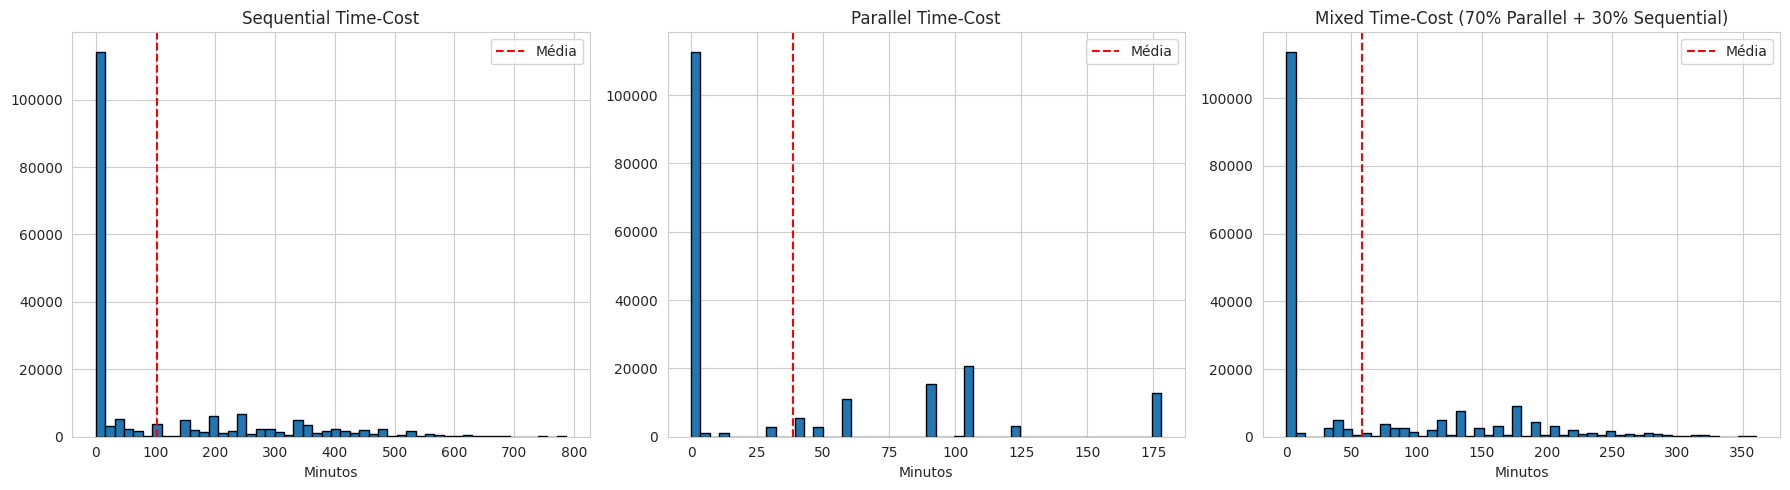

In [11]:
if 'total_lab_groups_ordered' in df_with_labs.columns:
    print("\n" + "="*60)
    print("CÁLCULO DE TIME-COSTS")
    print("="*60)
    
    df_with_costs = engineer.calculate_lab_time_costs(df_with_labs)
    
    # Visualizar distribuição de time-costs
    fig, axes = plt.subplots(1, 3, figsize=(18, 5))
    
    # Sequential
    df_with_costs['lab_time_cost_sequential'].hist(bins=50, ax=axes[0], edgecolor='black')
    axes[0].set_title('Sequential Time-Cost')
    axes[0].set_xlabel('Minutos')
    axes[0].axvline(df_with_costs['lab_time_cost_sequential'].mean(), 
                   color='red', linestyle='--', label='Média')
    axes[0].legend()
    
    # Parallel
    df_with_costs['lab_time_cost_parallel'].hist(bins=50, ax=axes[1], edgecolor='black')
    axes[1].set_title('Parallel Time-Cost')
    axes[1].set_xlabel('Minutos')
    axes[1].axvline(df_with_costs['lab_time_cost_parallel'].mean(), 
                   color='red', linestyle='--', label='Média')
    axes[1].legend()
    
    # Mixed
    df_with_costs['lab_time_cost_mixed'].hist(bins=50, ax=axes[2], edgecolor='black')
    axes[2].set_title('Mixed Time-Cost (70% Parallel + 30% Sequential)')
    axes[2].set_xlabel('Minutos')
    axes[2].axvline(df_with_costs['lab_time_cost_mixed'].mean(), 
                   color='red', linestyle='--', label='Média')
    axes[2].legend()
    
    plt.tight_layout()
    plt.show()
    
    df_final = df_with_costs
else:
    df_final = df_with_labs

In [12]:
print("\n" + "="*60)
print("RESUMO DE FEATURES")
print("="*60)

feature_summary = engineer.get_feature_summary(df_final)
print(feature_summary.to_string(index=False))

# ====== CÉLULA 9: Salvar Features ======
print("\n💾 Salvando features...")

output_path = '../data/processed/features_engineered.parquet'
engineer.save_features(df_final, output_path)

print("\n✅ Feature engineering completo!")
print(f"   Total de features: {len(df_final.columns)}")
print(f"   Registros: {len(df_final):,}")


RESUMO DE FEATURES
            Feature       Tipo  Completude (%)       Média         Std   Min           Max
triage_completeness     Triage      100.000000    6.950179    0.244464   5.0      7.000000
lab_BLOOD_GAS_value Laboratory       32.635680  124.545593   80.951881 -33.0   2970.000000
   lab_CARDIO_value Laboratory        2.263187 4809.570801 9202.236328   5.0  69767.000000
      lab_CBC_value Laboratory       31.347339   12.210676   18.547756   0.0    526.000000
     lab_CHEM_value Laboratory       31.973800   16.344990    9.885235   0.0    134.000000
     lab_COAG_value Laboratory       19.136383    5.018846   18.653532   0.8    150.899994
   lab_INFLAM_value Laboratory        6.708149  745.217407 6944.132812   0.1 209100.000000
  lab_LACTATE_value Laboratory       12.988613    1.957881    1.332448   0.0     21.000000
     lab_LFTS_value Laboratory       14.593091   70.047348  345.263123   0.0  13220.000000
   lab_LIPASE_value Laboratory        6.793791   99.373276  536.965149

INFO:src.data.feature_engineering:
💾 Features salvas em: ../data/processed/features_engineered.parquet
INFO:src.data.feature_engineering:   Tamanho: 16.0 MB
INFO:src.data.feature_engineering:   Registros: 189,158
INFO:src.data.feature_engineering:   Features: 77



✅ Feature engineering completo!
   Total de features: 77
   Registros: 189,158


In [13]:
if 'critical_outcome' in df_final.columns or 'lengthened_ed_stay' in df_final.columns:
    print("\n📊 Analisando correlações com outcomes...")
    
    # Selecionar features numéricas
    numeric_cols = df_final.select_dtypes(include=[np.number]).columns.tolist()
    
    # Remover IDs
    numeric_cols = [c for c in numeric_cols if not c.endswith('_id')]
    
    # Calcular correlações
    if 'critical_outcome' in df_final.columns:
        corr_critical = df_final[numeric_cols + ['critical_outcome']].corr()['critical_outcome'].sort_values(ascending=False)
        
        print("\n🎯 Top 10 features correlacionadas com Critical Outcome:")
        print(corr_critical.head(11)[1:])  # Excluir auto-correlação
        
        # Plot
        fig, ax = plt.subplots(figsize=(10, 6))
        corr_critical.head(20)[1:].plot(kind='barh', ax=ax)
        ax.set_title('Top Features Correlacionadas com Critical Outcome')
        ax.set_xlabel('Correlação')
        plt.tight_layout()
        plt.show()


📊 Analisando correlações com outcomes...
